<a href="https://colab.research.google.com/github/Ppangchon/project/blob/main/trainsavemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Library

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, AveragePooling2D, Flatten, Dropout, MaxPool2D)
import time
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from tensorflow import keras

# 2. ข้อมูล

In [3]:
from google.colab import drive # เชื่อม drive ของเรา Mounted at /content/drive เชื่อมสำเร็จ
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os # os จัดการเกี่ยวกับไฟล์ต่างๆ ในโฟล์เดอร์
path = '/content/drive/My Drive/trycode'  # data เราอยู่โฟล์เดอร์ไหน

In [6]:
train_dir ="/content/drive/My Drive/trycode/train"   # สำหรับ Train
test_dir ="/content/drive/My Drive/trycode/test"     # สำหรับ Validation
val_dir ="/content/drive/My Drive/trycode/val"       # สำหรับ Test

# ขนาดภาพอินพุตเข้าสู่ Model (W x H)
target_img_shape = (64,64)

In [7]:
# กำหนด Normalize pixel
train_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
train_set = train_datagen.flow_from_directory(train_dir, target_size=target_img_shape, batch_size=10, class_mode='categorical')

Found 60 images belonging to 4 classes.


In [28]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = train_datagen.flow_from_directory(val_dir, target_size=target_img_shape, batch_size=10, class_mode='categorical')   

Found 60 images belonging to 4 classes.


# Visualization

In [26]:
print('Train')
ids, counts = np.unique(train_set.classes, return_counts=True)
print(ids)        # คลาส
print(counts)     # จำนวนข้อมูลของคลาส

Train
[0 1 2 3]
[15 15 15 15]


In [29]:
print('Validation')
ids, counts = np.unique(val_set.classes, return_counts=True)
print(ids)        # คลาส
print(counts)     # จำนวนข้อมูลของคลาส

Validation
[0 1 2 3]
[15 15 15 15]


In [30]:
train_set[0][0][0].shape

(64, 64, 3)

# ดูตัวอย่างคลาส และ Visualize ภาพ

{'CSC': 0, 'NORMAL': 1, 'PCV': 2, 'VKH': 3}
(10, 64, 64, 3)
(10, 4)
class: [0. 1. 0. 0.]


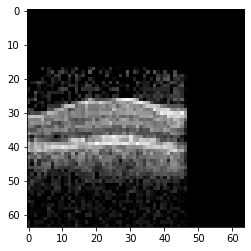

In [31]:
print(train_set.class_indices)

for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  plt.imshow(image_batch[0])
  print('class:', labels_batch[0])
  break

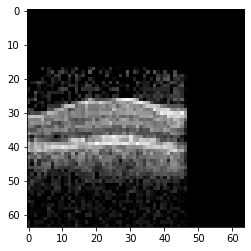

In [32]:
plt.imshow(train_set[0][0][0])
plt.show()

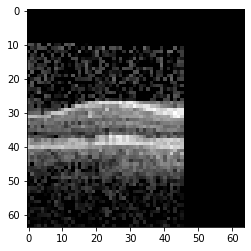

In [33]:
plt.imshow(val_set[0][0][0])
plt.show()

# สร้าง Model

In [45]:
in_shape = (target_img_shape[0], target_img_shape[1], 3)
in_shape

(64, 64, 3)

In [47]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = in_shape))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)       

## Complie และ Train

In [89]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [90]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [91]:
start = time.time()

history = model.fit(train_set, steps_per_epoch=len(train_set), 
                    validation_data=val_set, 
                    epochs=20,verbose=1)

end = time.time()
print("Time Taken: {:.2f} minutes".format((end-start)/60))

Epoch 1/20
6/6 [==============================] - 6s 825ms/step - loss: 0.0569 - accuracy: 0.9667 - val_loss: 1.9962e-04 - val_accuracy: 1.0000
Epoch 2/20
6/6 [==============================] - 2s 381ms/step - loss: 0.1659 - accuracy: 0.9667 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3/20
6/6 [==============================] - 2s 384ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 7.8633e-04 - val_accuracy: 1.0000
Epoch 4/20
6/6 [==============================] - 2s 368ms/step - loss: 8.8701e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 2s 378ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 2s 369ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 2s 367ms/step - loss: 9.1907e-04 - accuracy: 1.0000 - val_loss: 5.0053e-04 - val_accuracy: 1.0000


## ประเมิน

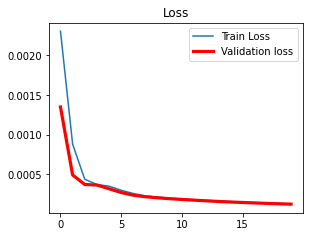

In [63]:
plt.figure(figsize = (10, 3.5))
plt.subplot(1, 2 , 1)
plt.title('Loss')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r', lw = 3.2, label = 'Validation loss')
plt.legend()

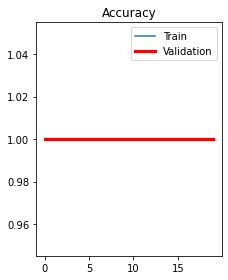

In [66]:
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], 'r', lw = 3.2, label = 'Validation')
plt.legend()
plt.tight_layout()
plt.show()

In [67]:
acc = model.evaluate(val_set, steps = len(val_set), verbose = 0)
print('score = {:.3f}' .format(acc[1]))

score = 1.000


# Save and load models

In [ ]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

# Create a new model instance
model = create_model()

# Restore the weights
model.load_weights('./checkpoints/my_checkpoint')

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

# ทดสอบและใช้งาน Model

In [76]:
target_img_shape = (64, 64)
test_image = image.load_img('IA3870 19-12-16 RE_002022.png', target_size = target_img_shape)

test_image = image.img_to_array(test_image)
test_image /= 255.0

plt.imshow(test_image)
plt.show()

AttributeError: ignored